# UAS Studi Kasus Mobile Price
Model KNN,Naive Bayes,K-Means,Decision Tree dan Random Forest

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Preprocessing Data


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/rahadis/datamining/main/train.csv')
data.fillna(0,inplace=True)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
cd = data.drop(columns=['price_range'],axis=1)

cd

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [4]:
y = data['price_range'].values
X= cd

## Save Preprocessing Data

In [5]:
from pathlib import Path  
filepath = Path('/content/gdrive/MyDrive/DataMining/Final/mobilepricefinal.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X.to_csv(filepath) 

# Tanpa Scaler

In [ ]:
p = data.drop(columns=['blue', 'dual_sim', 'four_g' , 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
p

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [ ]:
#fd1 = data.drop(columns=['blue', 'dual_sim', 'four_g' , 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
q = data.drop(columns=['battery_power','clock_speed','fc','int_memory','n_cores','pc','ram','m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time','price_range'],axis=1)
q

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


In [ ]:
scaled_fitur = p.join(q)
scaled_fitur

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,0,0,0,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,1,1,1,0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,1,1,1,0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1,0,0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,1,1,1,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,0,1,1,1
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,0,1,1,1,1,0
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0,0,1,1,1,1


# Min-Max Scaler


In [6]:
p = data.drop(columns=['blue', 'dual_sim', 'four_g' , 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
p

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(p)
nama_fitur = p.columns.copy()
scaled_fitur_p = pd.DataFrame(scaled,columns=nama_fitur)
scaled_fitur_p

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444
1996,0.977956,0.84,0.000000,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778
1997,0.941884,0.16,0.052632,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667
1998,0.675351,0.16,0.210526,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444


## Min-Max Scaler (Categorical)


In [8]:
q = data.drop(columns=['battery_power','clock_speed','fc','int_memory','n_cores','pc','ram','m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time','price_range'],axis=1)
q

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(q)
nama_fitur = q.columns.copy()
scaled_fitur_q = pd.DataFrame(scaled,columns=nama_fitur)
scaled_fitur_q

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
1995,1.0,1.0,1.0,1.0,1.0,0.0
1996,1.0,1.0,0.0,1.0,1.0,1.0
1997,0.0,1.0,1.0,1.0,1.0,0.0
1998,0.0,0.0,1.0,1.0,1.0,1.0


# Gabung data

In [10]:
scaled_fitur = scaled_fitur_p.join(scaled_fitur_q)
nama_fitur = scaled_fitur.columns.copy()
scaled_fitur

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,0.0,0.0,0.0,1.0
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,1.0,1.0,1.0,0.0
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,1.0,1.0,1.0,0.0
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,1.0,0.0,0.0
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,1.0,1.0,1.0,0.0
1996,0.977956,0.84,0.000000,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,0.0,1.0,1.0,1.0
1997,0.941884,0.16,0.052632,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,0.0,1.0,1.0,1.0,1.0,0.0
1998,0.675351,0.16,0.210526,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,0.0,0.0,1.0,1.0,1.0,1.0


#Split Data 10%

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(scaled_fitur, y, test_size=0.1, random_state=1)
X_train.shape + X_test.shape

(1800, 20, 200, 20)

#Save normalisasi

In [12]:
X_train

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
541,0.195057,0.28,0.052632,0.580645,0.555556,0.800000,0.428571,0.35,0.625510,0.877837,0.770444,0.071429,0.055556,0.555556,0.0,1.0,1.0,1.0,1.0,1.0
1132,0.683367,0.52,0.000000,0.129032,0.555556,0.783333,0.428571,0.05,0.078571,0.033378,0.647247,0.785714,0.277778,0.611111,1.0,1.0,0.0,1.0,0.0,1.0
1582,0.447562,0.48,0.105263,0.274194,0.222222,0.725000,0.857143,0.95,0.126531,0.170227,0.001871,0.071429,0.277778,0.333333,1.0,1.0,0.0,0.0,0.0,0.0
1244,0.144957,0.92,0.526316,0.919355,0.777778,0.275000,0.714286,0.65,0.604592,0.592123,0.419027,0.428571,0.500000,0.055556,0.0,0.0,0.0,1.0,1.0,0.0
1947,0.859719,0.00,0.000000,0.064516,0.111111,0.508333,0.714286,0.80,0.076020,0.348465,0.551844,0.142857,0.277778,1.000000,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0.468938,0.00,0.000000,0.145161,0.888889,0.241667,0.142857,0.60,0.017857,0.006676,0.378407,0.857143,0.722222,0.944444,1.0,1.0,1.0,1.0,1.0,0.0
1096,0.436206,0.60,0.315789,0.532258,0.777778,0.658333,0.571429,0.80,0.511735,0.885848,0.803314,0.785714,0.833333,0.777778,0.0,0.0,1.0,1.0,0.0,0.0
1932,0.144957,0.44,0.052632,0.451613,0.333333,0.108333,0.285714,0.60,0.337755,0.331776,0.359433,0.357143,0.500000,0.555556,1.0,1.0,1.0,1.0,1.0,1.0
235,0.682699,0.52,0.315789,0.145161,0.000000,0.408333,0.000000,0.40,0.075510,0.738318,0.120524,1.000000,0.444444,0.944444,1.0,0.0,1.0,1.0,1.0,0.0


#Save Data Fix

In [ ]:
from pathlib import Path  
filepath = Path('/content/gdrive/MyDrive/DataMining/Final/Datafinal.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_csv(filepath) 

#Inisialisasi Model KNN

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [14]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Try running from k=1 through 30 and record testing accuracy
k_range = range(1,31)
scores = {}
scores_list = []
for k in k_range:
        # install model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        # save model
        #filenameKNN = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/KNNFinal/KNNmodel'+str(k)+'.pkl'
        #joblib.dump(knn,filenameKNN)
        y_pred=knn.predict(X_test)
        scores[k] = accuracy_score(y_test,y_pred)
        scores_list.append(accuracy_score(y_test,y_pred))
scores

{1: 0.405,
 2: 0.38,
 3: 0.375,
 4: 0.405,
 5: 0.415,
 6: 0.415,
 7: 0.415,
 8: 0.425,
 9: 0.41,
 10: 0.46,
 11: 0.43,
 12: 0.44,
 13: 0.445,
 14: 0.44,
 15: 0.45,
 16: 0.44,
 17: 0.48,
 18: 0.5,
 19: 0.475,
 20: 0.49,
 21: 0.515,
 22: 0.5,
 23: 0.48,
 24: 0.505,
 25: 0.495,
 26: 0.5,
 27: 0.53,
 28: 0.515,
 29: 0.49,
 30: 0.515}

In [15]:
y_pred 

array([0, 0, 1, 1, 1, 1, 2, 2, 1, 3, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 3, 2,
       0, 0, 3, 2, 2, 1, 1, 3, 1, 0, 2, 0, 3, 3, 1, 1, 2, 0, 1, 1, 1, 0,
       0, 2, 2, 2, 0, 2, 0, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 2, 3, 2, 1, 1, 1, 2, 2, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 1, 2, 0,
       2, 0, 3, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 3, 0, 2, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2,
       0, 3, 2, 1, 3, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 3, 3, 3, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 2, 2, 3, 1, 3, 0, 3, 0, 2, 3,
       3, 0, 1, 3, 1, 3, 1, 1, 1, 3, 1, 0, 2, 2, 2, 2, 1, 3, 0, 0, 1, 3,
       3, 0])

##Visualisasi Score

Text(0, 0.5, 'Testing Accuracy')

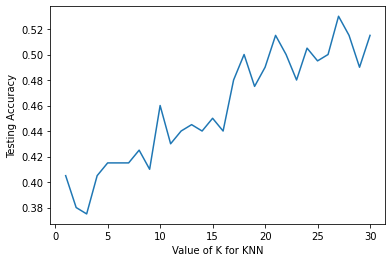

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [17]:
scores_list.index(max(scores_list))+1 , max(scores_list)

(27, 0.53)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [19]:
knn = KNeighborsClassifier(n_neighbors=scores_list.index(max(scores_list))+1)
knn.fit(X_train,y_train)
y_pred_knn =knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred_knn)
precision = round(precision_score(y_test,y_pred_knn, average="macro")*100,2)
acc = round(accuracy_score(y_test,y_pred_knn)*100,2)
recall = round(recall_score(y_test,y_pred_knn, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred_knn, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc))

Konfusi Matrix
 [[32 12  5  0]
 [14 23 14  1]
 [ 5 15 24  5]
 [ 0  8 15 27]]
precision: 56.4
recall: 53.13
fscore: 53.93
accuracy: 53.0


#Inisialisasi Model Naive Bayes

### Eksekusi pada Model

In [20]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
probas = clf.predict_proba(X_test)[:,1]
y_pred

array([0, 1, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 1, 3, 2, 1, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 2, 0,
       2, 1, 3, 0, 1, 2, 1, 3, 3, 0, 2, 3, 3, 3, 0, 2, 2, 1, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 2, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 2, 2, 3, 2, 3, 0, 1, 2, 3,
       3, 1])

### Save Model `Naive bayes`


In [ ]:
filenameNB = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/ModelNBFinal.pkl'
joblib.dump(clf,filenameNB)

['/content/gdrive/MyDrive/DataMining/TUGAS/Model/ModelNBFinal.pkl']

### Menghitung Probas

In [21]:
probas

array([1.07899539e-01, 5.00561911e-01, 7.31150594e-01, 2.58097257e-01,
       9.17232442e-04, 8.34673315e-01, 6.33317623e-01, 4.56360729e-02,
       1.12806841e-01, 9.22794736e-06, 2.74927659e-02, 3.13911716e-05,
       6.22763062e-01, 6.87281320e-01, 7.03331063e-04, 1.23940208e-01,
       4.48087116e-01, 6.35052204e-01, 6.13706924e-01, 4.30856519e-02,
       3.77061330e-05, 3.93494678e-05, 7.20157899e-01, 1.19215554e-01,
       1.20597805e-05, 7.29985245e-02, 8.71895743e-02, 2.06820220e-02,
       4.88840066e-01, 1.16741909e-01, 3.37613790e-01, 5.75230543e-01,
       9.03608528e-03, 1.73751741e-02, 9.00251950e-06, 1.68391890e-03,
       3.61622891e-01, 2.06323439e-01, 7.00393930e-01, 4.42756522e-01,
       8.54455673e-01, 2.67332066e-01, 2.52270102e-02, 8.29496048e-01,
       3.54090510e-02, 8.03003613e-01, 7.63491931e-04, 1.46002460e-01,
       5.42165457e-01, 8.46042076e-02, 2.25873614e-01, 3.28207539e-04,
       8.03156936e-01, 4.23573039e-05, 1.90552254e-01, 2.48171422e-04,
      

### Menghitung Hasil Akhir

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
precision = round(precision_score(y_test,y_pred, average="macro")*100,2)
acc_nb = round(accuracy_score(y_test,y_pred)*100,2)
recall = round(recall_score(y_test,y_pred, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc_nb))

Konfusi Matrix
 [[40  9  0  0]
 [ 5 32 15  0]
 [ 0  9 34  6]
 [ 0  0  6 44]]
precision: 75.68
recall: 75.14
fscore: 75.31
accuracy: 75.0


# Inisialisasi K-Means Clustering

### Eksekusi Pada Model

In [ ]:
from sklearn.cluster import KMeans

# #Try running from n=1 through 30 and record testing accuracy
n_range = range(1,31)
akurasi = {}
akurasi_score = []
for k in n_range:
        # install model
        kmeans = KMeans(n_clusters=k,random_state=0)
        kmeans.fit(X_train,y_train)
        y_pred=kmeans.predict(X_test)
        akurasi[k] = accuracy_score(y_test,y_pred)
        akurasi_score.append(accuracy_score(y_test,y_pred))
akurasi_score


[0.23,
 0.2575,
 0.245,
 0.265,
 0.1925,
 0.175,
 0.1925,
 0.115,
 0.1,
 0.09,
 0.105,
 0.0925,
 0.09,
 0.055,
 0.0775,
 0.0675,
 0.0675,
 0.05,
 0.0575,
 0.045,
 0.0425,
 0.0425,
 0.04,
 0.04,
 0.05,
 0.0275,
 0.0475,
 0.04,
 0.0425,
 0.0375]

In [ ]:
# save model
filenameKMeans = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/KmeansFinal/modelKMeans'+str(k)+'.pkl'
joblib.dump(kmeans,filenameKMeans)

### Visualisasi Hasil K-means

Text(0, 0.5, 'Testing Accuracy')

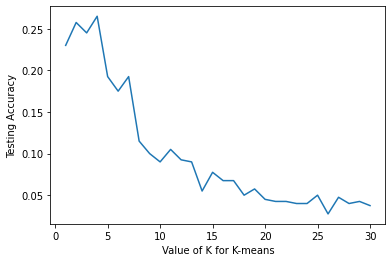

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(n_range,akurasi_score)
plt.xlabel('Value of K for K-means')
plt.ylabel('Testing Accuracy')

Nilai n dengan akurasi tertinggi

In [ ]:
akurasi_score.index(max(akurasi_score)) , max(akurasi_score)

(3, 0.265)

#Inisialisasi Decision tree

Eksekusi pada model

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =5, random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Decision three rules text

In [ ]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(dtc,
                        feature_names = list(nama_fitur))
#print the result
print(tree_rules)

|--- ram <= 0.53
|   |--- ram <= 0.23
|   |   |--- px_height <= 0.74
|   |   |   |--- ram <= 0.21
|   |   |   |   |--- battery_power <= 0.91
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- battery_power >  0.91
|   |   |   |   |   |--- class: 0
|   |   |   |--- ram >  0.21
|   |   |   |   |--- battery_power <= 0.33
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- battery_power >  0.33
|   |   |   |   |   |--- class: 1
|   |   |--- px_height >  0.74
|   |   |   |--- battery_power <= 0.48
|   |   |   |   |--- ram <= 0.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ram >  0.15
|   |   |   |   |   |--- class: 1
|   |   |   |--- battery_power >  0.48
|   |   |   |   |--- class: 1
|   |--- ram >  0.23
|   |   |--- ram <= 0.33
|   |   |   |--- battery_power <= 0.41
|   |   |   |   |--- px_height <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- px_height >  0.42
|   |   |   |   |   |--- class: 1
|   |   |   |--- battery_power >  0.41
|   |   |   |   |--- p

Rules decision three plot diagram

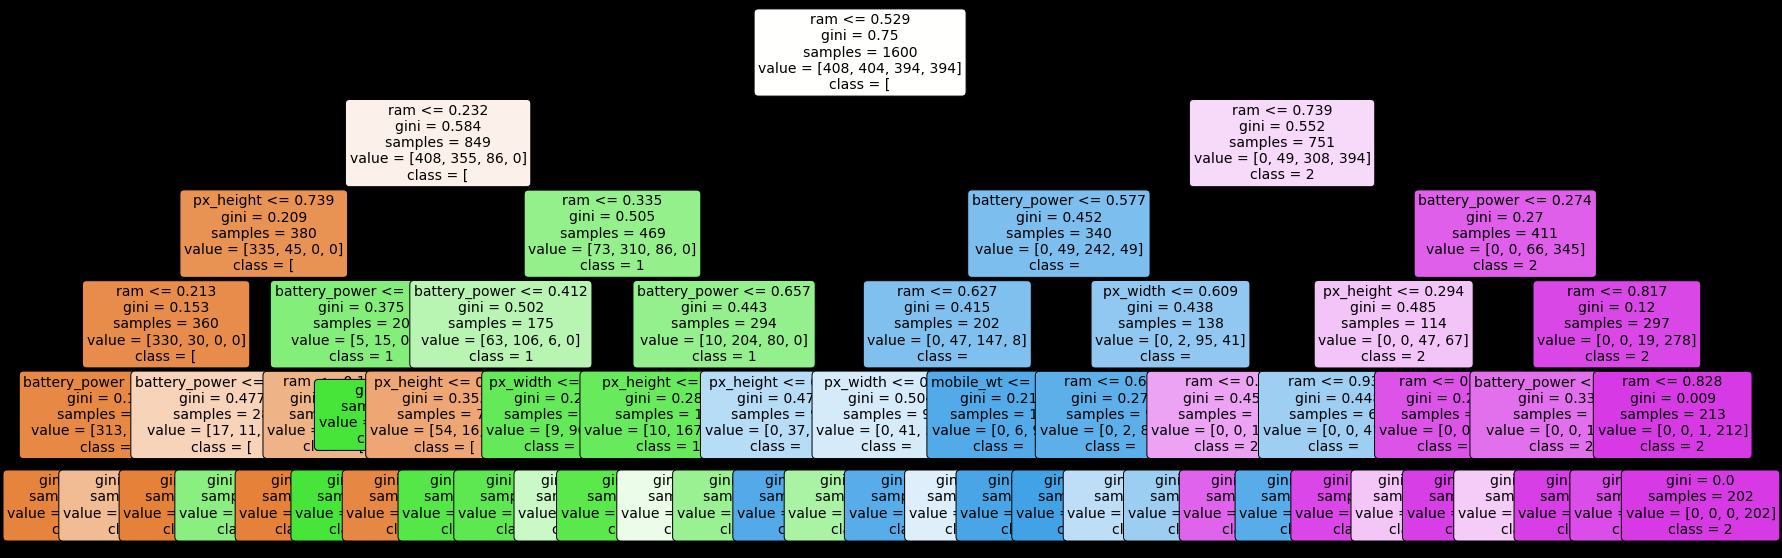

In [ ]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt

#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(dtc,feature_names = nama_fitur,class_names = str(y),rounded = True,filled = True,fontsize=14)
#show the plot
plt.show()


Hasil

In [24]:
Sdtc_pred = dtc.predict(X_test)
Sdtc_pred

array([0, 0, 1, 0, 3, 2, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 1, 3, 2, 3, 2, 2, 2, 2, 1, 2, 0, 3, 2, 0, 0, 1, 1, 1, 1, 3, 1,
       0, 1, 2, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 2, 3, 2, 0, 2, 1, 3, 1, 1,
       1, 2, 2, 2, 1, 3, 0, 2, 3, 1, 2, 1, 1, 0, 0, 3, 1, 3, 3, 2, 3, 1,
       1, 1, 3, 0, 1, 1, 2, 2, 3, 0, 2, 2, 3, 2, 0, 1, 2, 1, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 3, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 2, 0, 3, 0, 0, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 0, 1, 1, 3,
       2, 1])

In [25]:
cm_dtc = confusion_matrix(y_test,Sdtc_pred)
precision_dtc = round(precision_score(y_test,Sdtc_pred, average="macro")*100,2)
acc_dtc = round(accuracy_score(y_test,Sdtc_pred)*100,2)
recall_dtc = round(recall_score(y_test,Sdtc_pred, average="macro")*100,2)
f1score_dtc = round(f1_score(y_test, Sdtc_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm_dtc)
print('precision: {}'.format(precision_dtc))
print('recall: {}'.format(recall_dtc))
print('fscore: {}'.format(f1score_dtc))
print('accuracy: {}'.format(acc_dtc))

Konfusi Matrix
 [[39 10  0  0]
 [ 2 47  3  0]
 [ 0  9 29 11]
 [ 0  0 14 36]]
precision: 76.49
recall: 75.29
fscore: 75.4
accuracy: 75.5


In [ ]:
filenameNB = '/content/gdrive/MyDrive/DataMining/Final/Model/DTFinal.pkl'
joblib.dump(dtc,filenameNB)

['/content/gdrive/MyDrive/DataMining/Final/Model/DTFinal.pkl']

# Inisiaiisasi Model Random Forest

Mencari akurasi tertinggi dengan N_estimators dari 2 sampai 100

In [26]:
from sklearn.ensemble import RandomForestClassifier
akurasirf= []
n_estimator = range(2,101)
for n in n_estimator:
  # inisialisasi model
  rf = RandomForestClassifier(
                          n_estimators=n,max_depth=2, random_state=40).fit(X_train, y_train)
  # predict x_test
  y_predrf = rf.predict(X_test)
  # akurasi count
  akurasirf.append(accuracy_score(y_test,y_predrf))


In [ ]:
rf = RandomForestClassifier(
                          n_estimators=13,max_depth=2, random_state=40).fit(X_train, y_train)
filenameRF = '/content/gdrive/MyDrive/DataMining/Final/Model/randomforestfinal.pkl'
joblib.dump(rf,filenameRF)


['/content/gdrive/MyDrive/DataMining/Final/Model/randomforestfinal.pkl']

Visualisasi Hasil Akurasi 

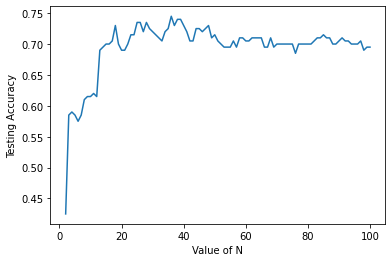

In [27]:
plt.plot(n_estimator,akurasirf)
plt.xlabel('Value of N')
plt.ylabel('Testing Accuracy')
plt.show()

Mencari Akurasi Tertinggi dari N

In [28]:
akurasirf.index(max(akurasirf))+1 , max(akurasirf)

(35, 0.745)